In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## EDA:

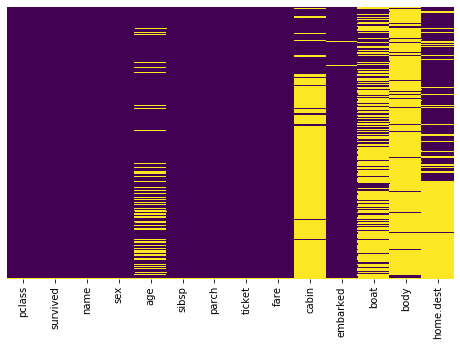

In [3]:
#We can see the columns that have missing values and will deal with it in the next section
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

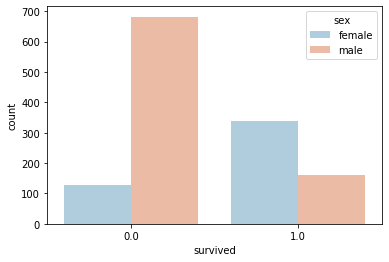

In [4]:
#It shows that from the people who dint survive maximum were males and almost twice females survived!
sns.countplot(x='survived',data=df, hue='sex', palette='RdBu_r')

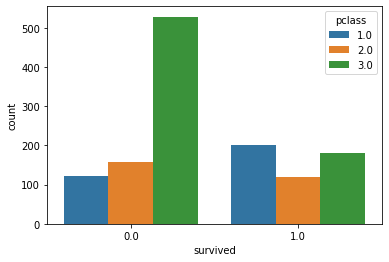

In [5]:
#The third class passangers were amazingly most among Non-Survivors 
sns.countplot(x='survived',data=df, hue='pclass')

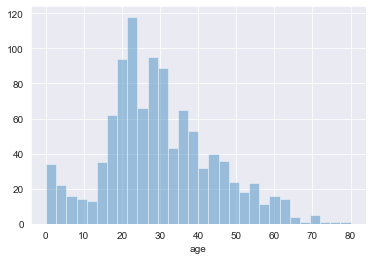

In [6]:
#There were few senior citizens and most people belonged to the younger age group
sns.set_style('darkgrid')

sns.distplot(df['age'].dropna(),kde=False, bins=30)

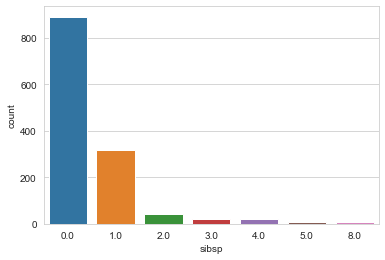

In [7]:
#Category 0 were single's with no spouse or children, Category 1 are probably married couples.
sns.set_style('whitegrid')
sns.countplot(x='sibsp', data=df) 

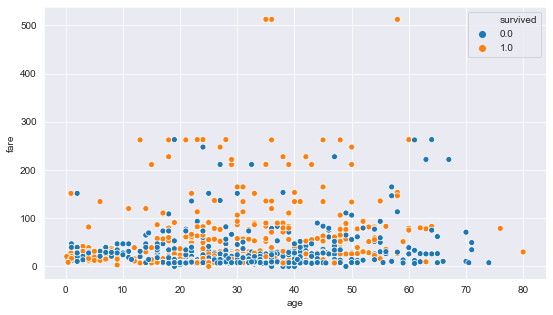

In [8]:
#We can see that which passanger had what age how much he/she paid and whether they survived or not.

sns.set_style('darkgrid')
plt.figure(figsize=(9,5))
sns.scatterplot(x=df['age'], y=df['fare'], hue=df['survived'])

### Cleaning Data :

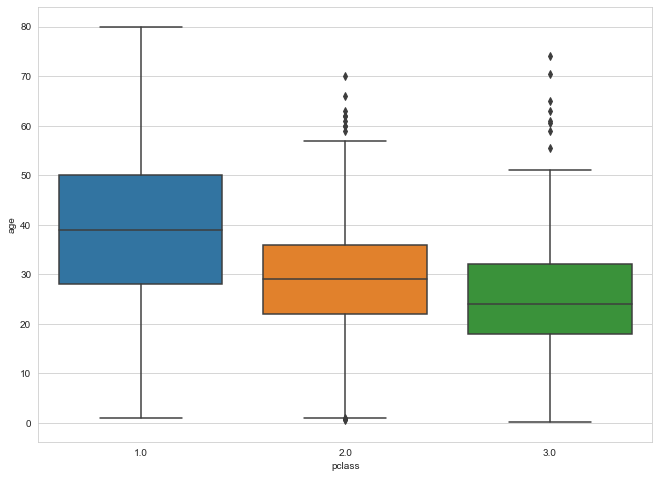

In [9]:
#We can see the wealthier passangers from 1st and 2nd class tend to be older from the passangers in 3rd class 
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))

sns.boxplot(x='pclass', y='age', data=df)

## We can use these average age values depending upon the classes to fill on the missing data!

In [10]:
def fill_age(columns):
    Age = columns[0] #retrieving age value since it was first column when calling
    pclass = columns[1] #retrieving pclass value since it was second column when calling
    
    if pd.isnull(Age):
        #Fill the null values with mean ages based on their classes
        if pclass == 1:
            return 38 
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24 
    else: #if age is not null then dont change it
        return Age

In [11]:
df['age'] = df[['age','pclass']].apply(fill_age, axis=1) #filling null values with mean ages

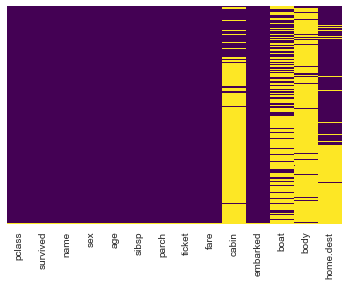

In [12]:
#We have filled all the null values for the age column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
#There are people who dint survived and their bodies were also not found so this information is hugely missing and hence shall be dropped.
df[(df['survived']==0.0) & (df['body'] != 'NaN')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 2 to 1308
Data columns (total 14 columns):
pclass       809 non-null float64
survived     809 non-null float64
name         809 non-null object
sex          809 non-null object
age          809 non-null float64
sibsp        809 non-null float64
parch        809 non-null float64
ticket       809 non-null object
fare         808 non-null float64
cabin        102 non-null object
embarked     809 non-null object
boat         9 non-null object
body         121 non-null float64
home.dest    398 non-null object
dtypes: float64(7), object(7)
memory usage: 94.8+ KB


C:\Users\capri\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [14]:
# Value at index 1290 and many other values have cases where the person survived but the boat number was not noted. There can be no useful information brought from this column so we will drop it.
df[['survived','boat']].iloc[[1290]]

,survived,boat
1290,1.0,NaN


In [15]:
#Dropping the not useful columns
df.drop('body',axis=1, inplace=True)
df.drop('boat', axis=1, inplace=True)
df.drop('cabin', axis=1, inplace=True)
df.drop('home.dest', axis=1, inplace = True)

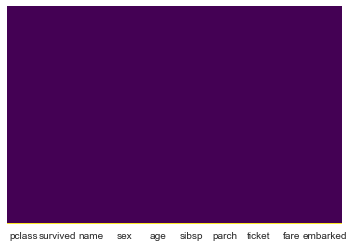

In [16]:
#All the null values have been filled out
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Creating Dummies:

In [17]:
#We drop the first column because then these two columns will become perfect predictors of each other
sex = pd.get_dummies(df['sex'], drop_first=True)
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


In [18]:
# C column is dropped and its value can be obtained when both are 0
embark = pd.get_dummies(df['embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [19]:
#Adding these columns to the dataframe
df = pd.concat([df,sex,embark],axis=1)

In [20]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,0,0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,1,0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,0,0,1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,1,0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,0,0,1


In [21]:
#Dropping embarked and sex because we have encoded it to other columns

In [22]:
df.drop(['sex','embarked','name','ticket'], axis=1, inplace = True)

In [23]:
df.dropna(inplace=True)

In [24]:
#Finally we have out data where all columns are numberical perfect for the algorithm
df.head()

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0,0,1


### Performing Analysis

In [25]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'male', 'Q',
       'S'],
      dtype='object')

In [26]:
x = df[['pclass','age', 'sibsp', 'parch', 'fare', 'male', 'Q', 'S']]
y = df['survived']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()

In [31]:
logmodel.fit(x_train, y_train)

C:\Users\capri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions = logmodel.predict(x_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       240
         1.0       0.75      0.70      0.73       153

    accuracy                           0.79       393
   macro avg       0.79      0.78      0.78       393
weighted avg       0.79      0.79      0.79       393



In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(y_test, predictions)
cmatrix = pd.DataFrame(cm, columns=['Predicted:\n NO', 'Predicted:\n YES'], index=['Actual: NO', 'Actual: YES'])
cmatrix

,Predicted: NO,Predicted: YES
Actual: NO,205,35
Actual: YES,46,107


In [37]:
# Our model had an accuracy of 79% while predicting the cases of survival using Logistic Regression.

# K Nearest Neighbors Algorithm

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(df.drop('survived',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
scaled_features = scaler.transform(df.drop('survived',axis=1))

In [42]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'male', 'Q',
       'S'],
      dtype='object')

In [43]:
df_feat = pd.DataFrame(scaled_features,columns=['pclass','age', 'sibsp', 'parch', 'fare', 'male', 'Q', 'S'])
df_feat.head()

,pclass,age,sibsp,parch,fare,male,Q,S
0,-1.545283,-0.011720,-0.479312,-0.445203,3.441165,-1.344198,-0.322176,0.657753
1,-1.545283,-2.151770,0.480780,1.865614,2.285603,0.743938,-0.322176,0.657753
2,-1.545283,-2.069218,0.480780,1.865614,2.285603,-1.344198,-0.322176,0.657753
3,-1.545283,0.064484,0.480780,1.865614,2.285603,0.743938,-0.322176,0.657753
4,-1.545283,-0.316534,0.480780,1.865614,2.285603,-1.344198,-0.322176,0.657753


## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['survived'], test_size=0.30)

## Using KNN

We are trying to come up with a model to predict whether someone will Survive or not. We'll start with k=1.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [46]:
pred = knn.predict(X_test)

### Predictions and Evaluations

Let's evaluate our KNN model!

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[195  39]
 [ 52 107]]
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       234
         1.0       0.73      0.67      0.70       159

    accuracy                           0.77       393
   macro avg       0.76      0.75      0.76       393
weighted avg       0.77      0.77      0.77       393



We get an accuracy value of 74% for k=1

In [48]:
# Choosing a K Value for getting the best accuracy
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

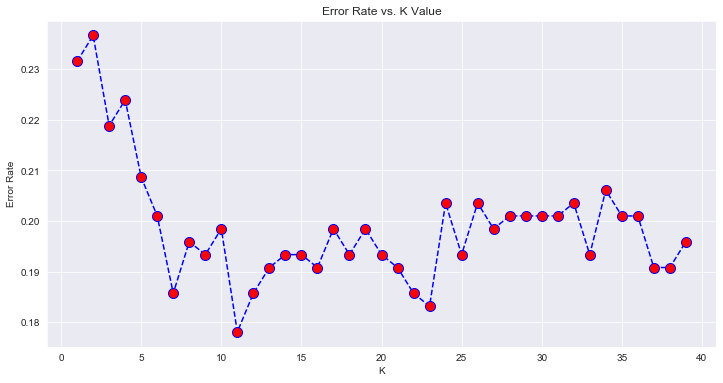

In [49]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [50]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[205  29]
 [ 53 106]]


              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       234
         1.0       0.79      0.67      0.72       159

    accuracy                           0.79       393
   macro avg       0.79      0.77      0.78       393
weighted avg       0.79      0.79      0.79       393



# Support Vector Machine Classifier

We need to split the dataset again because old training set was used in KNN where it was scaled!

In [51]:
svm_x_train, svm_x_test, svm_y_train, svm_y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [52]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(svm_x_train, svm_y_train)

C:\Users\capri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
svm_pred = classifier.predict(svm_x_test)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(svm_y_test,svm_pred))
print(classification_report(svm_y_test,svm_pred))

[[192  48]
 [ 76  77]]
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76       240
         1.0       0.62      0.50      0.55       153

    accuracy                           0.68       393
   macro avg       0.67      0.65      0.65       393
weighted avg       0.68      0.68      0.68       393



## ROC and AUC plot

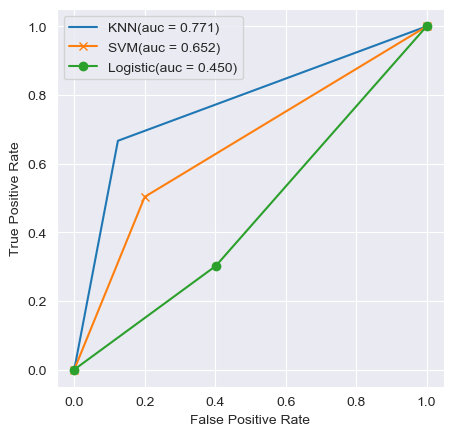

In [55]:
from sklearn.metrics import roc_curve, auc

log_fpr, log_tpr, log_thres = roc_curve(y_test, predictions)
log_auc = auc(log_fpr, log_tpr)

knn_fpr, knn_tpr, knn_thres = roc_curve(y_test, pred)
knn_auc = auc(knn_fpr, knn_tpr)

svm_fpr, svm_tpr, svm_thres = roc_curve(svm_y_test, svm_pred)
svm_auc = auc(svm_fpr, svm_tpr)

#Plotting the curve
plt.figure(figsize=(5,5), dpi=100)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN(auc = %0.3f)'%knn_auc)
plt.plot(svm_fpr, svm_tpr, marker='x', label='SVM(auc = %0.3f)'%svm_auc)
plt.plot(log_fpr, log_tpr, marker='o', label='Logistic(auc = %0.3f)'%log_auc)



plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


KNN (auc = 0.776)
SVM(auc = 0.652)
Logistic(auc = 0.535)

## Conclusion :
By looking at the Area Under Curve (AUC) values we can see that KNN model has the largest value among all the models.
Large value indicates greater area under the curve. Greater the AUC the better the model!

Considering a point on the KNN curve we can see that it has a TPR value of 0.7 and FPR value around 0.1 which is really good.
At the same time we can see the Logistic curve shows a low TPR and Low FPR value for the same point.
Thus by looking at all the metrics we can say that the KNN alogirthm has been the best to predict the model.